# Calculating J-factors via `gammapy`

In [1]:
from gammapy.astro.darkmatter import profiles, JFactory

In [2]:
from gammapy.maps import WcsGeom, WcsNDMap
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from regions import CircleSkyRegion
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [3]:
profile = profiles.NFWProfile()

# Adopt standard values used in HESS
profiles.DMProfile.DISTANCE_GC = 8.33 * u.kpc
profiles.DMProfile.LOCAL_DENSITY = 0.3 * u.Unit("GeV / cm3")

profile.scale_to_local_density()

position = SkyCoord(0.0, 0.0, frame="galactic", unit="deg")
geom = WcsGeom.create(binsz=0.05, skydir=position, width=10.0, frame="galactic")

In [6]:
jfactory = JFactory(
    geom=geom, profile=profile, distance=profiles.DMProfile.DISTANCE_GC
)
jfact = jfactory.compute_jfactor()

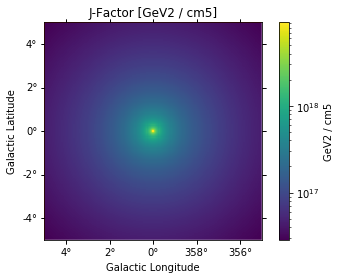

In [32]:
jfact_map = WcsNDMap(geom=geom, data=jfact.value, unit=jfact.unit)
fig, ax, im = jfact_map.plot(cmap="viridis", norm=LogNorm(), add_cbar=True)
plt.title(f"J-Factor [{jfact_map.unit}]")
pix_reg.plot(ax=ax, facecolor="none", edgecolor="red", label="1 deg circle")
plt.show()

In [18]:
from regions import RectangleSkyRegion

In [26]:
sky_reg = RectangleSkyRegion(center=position,
                            width=10*u.deg, 
                            height=10*u.deg)

In [27]:
pix_reg = sky_reg.to_pixel(wcs=geom.wcs)

In [42]:
from astropy.io import fits

In [43]:
with fits.open('maps/apertures.fits') as hdul:
    data = hdul[0].data

In [28]:
sky_reg = RectangleSkyRegion

In [29]:
total_jfact = pix_reg.to_mask().multiply(jfact).sum()

In [30]:
pix_reg

<RectanglePixelRegion(PixCoord(x=99.5, y=99.5), width=200.00000000015916, height=200.00000000015916, angle=0.0 deg)>

In [31]:
total_jfact

<Quantity 3.67378063e+21 GeV2 / cm5>